<a href="https://colab.research.google.com/github/Omkar1718/Deep-learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression


In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [ ]:
import pandas as pd
url ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2 - Perfom basic data quality check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()

41

In [ ]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


#  Step 3 - seperate X and Y(PE)

In [ ]:
X = df.drop(columns = ["PE"])
Y = df[["PE"]]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply preprocessing on X

In [ ]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline (
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


#  Step 4 - Apply train And test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain ,ytest = train_test_split(X_pre,Y,test_size= 0.2,random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [ ]:
xtrain.shape

(7654, 4)

In [ ]:
xtrain.shape[1]

4

In [ ]:
xtest.shape

(1914, 4)

# Step 5 - Training the neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [ ]:
# initialize the neural network
model = Sequential()

In [ ]:
# create input layer
model.add(Input(shape=(xtrain.shape[1],)))

In [ ]:
# create hidden layer
model.add(Dense(units=8,activation = "relu"))

In [ ]:
# create hidden layer
model.add(Dense(units=4 , activation="relu"))

In [ ]:
# create output layer
model.add(Dense(units=1,activation="linear"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310 (1.21 KB)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 206 (828.00 B)

In [ ]:
model.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [ ]:
hist = model.fit(xtrain ,ytrain , validation_split=0.2,epochs=60)

Epoch 1/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 205263.0312 - mae: 431.8237 - val_loss: 1704.0542 - val_mae: 40.9530
Epoch 2/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 444.5533 - mae: 16.2232 - val_loss: 29.9758 - val_mae: 3.7635
Epoch 3/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.7017 - mae: 3.8145 - val_loss: 29.4787 - val_mae: 3.7405
Epoch 4/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.3010 - mae: 3.8082 - val_loss: 28.9808 - val_mae: 3.7268
Epoch 5/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30.1358 - mae: 3.8700 - val_loss: 28.6304 - val_mae: 3.7239
Epoch 6/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.4854 - mae: 3.8905 - val_loss: 28.5567 - val_mae: 3.7499
Epoch 7/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.8465 - mae: 3.8637 - val_loss: 27.5657 - val_mae: 3.7007
Epoch 8/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9988 - mae: 3.8131 - val_loss: 26.9796 - val_mae: 3.6896
Epoch 9/60
192/192 ━━━━━━━━━

In [ ]:
hist.history["loss"]

[110013.546875,
 161.02806091308594,
 29.35524559020996,
 29.00370216369629,
 28.741315841674805,
 28.421884536743164,
 28.121957778930664,
 27.819704055786133,
 27.44343376159668,
 27.10359001159668,
 26.7197322845459,
 26.444725036621094,
 26.127197265625,
 25.778072357177734,
 25.434412002563477,
 25.128616333007812,
 24.862960815429688,
 24.6527099609375,
 24.393646240234375,
 24.21238136291504,
 23.95052146911621,
 23.7917423248291,
 23.63361930847168,
 23.496034622192383,
 23.37779426574707,
 23.3124942779541,
 23.17803955078125,
 23.154521942138672,
 23.045204162597656,
 22.998579025268555,
 22.980741500854492,
 23.10416603088379,
 22.921239852905273,
 22.90121841430664,
 22.996414184570312,
 22.787160873413086,
 22.783212661743164,
 22.966733932495117,
 23.11322784423828,
 22.847564697265625,
 22.79772186279297,
 22.667078018188477,
 23.045568466186523,
 22.750633239746094,
 22.942794799804688,
 22.824338912963867,
 23.964990615844727,
 22.870607376098633,
 22.774572372436523,


In [ ]:
hist.history["val_loss"]

[1704.05419921875,
 29.975820541381836,
 29.478654861450195,
 28.980792999267578,
 28.630367279052734,
 28.55673599243164,
 27.565710067749023,
 26.979568481445312,
 26.50259017944336,
 26.13253402709961,
 25.458080291748047,
 24.924959182739258,
 24.530960083007812,
 23.871381759643555,
 23.600605010986328,
 23.033554077148438,
 22.636104583740234,
 22.465015411376953,
 22.08026123046875,
 21.95198631286621,
 21.42941665649414,
 21.22918701171875,
 20.8410587310791,
 21.498489379882812,
 20.638586044311523,
 20.331619262695312,
 20.58448028564453,
 20.500410079956055,
 20.05887794494629,
 21.023513793945312,
 19.722301483154297,
 19.825345993041992,
 20.56125259399414,
 20.04938316345215,
 19.54067039489746,
 20.368932723999023,
 20.01705551147461,
 19.426298141479492,
 20.480894088745117,
 23.048696517944336,
 19.481590270996094,
 19.6354923248291,
 21.35134506225586,
 20.25374984741211,
 22.028162002563477,
 21.03292465209961,
 19.377031326293945,
 19.253679275512695,
 20.5271205902

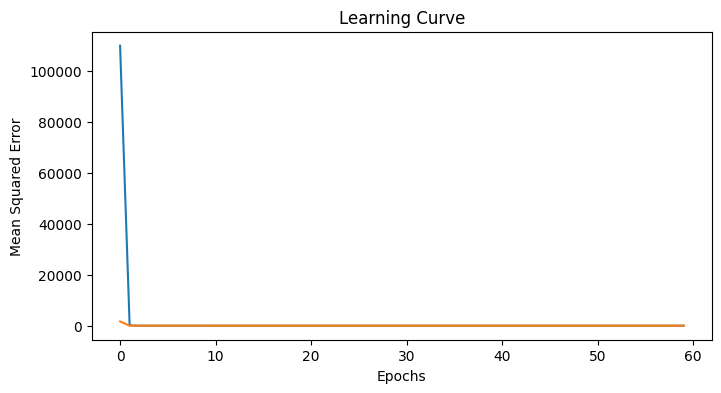

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

# Step6 - Model evaluation

In [ ]:

model.evaluate(xtrain,ytrain)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.4768 - mae: 3.8402


[23.033157348632812, 3.779130697250366]

In [ ]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.0136 - mae: 3.5261


[20.762523651123047, 3.5938522815704346]

In [ ]:



ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
ypred_test[0:5]

array([[434.87854],
       [435.92154],
       [459.84222],
       [474.49924],
       [434.441  ]], dtype=float32)

In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [ ]:
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9212601184844971

# step 7 - Out of sample prediction


In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:


num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
Pipeline = Pipeline(steps=[('simpleimputer',SimpleImputer(strategy="median")),
                'standardscaler',StandardScaler()
])

In [ ]:
xnew_pre = num_pipe.fit_transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.427011,0.406243,-0.567574,0.798624
1,1.326264,0.087032,-0.974534,-2.089095
2,1.186943,1.575060,-1.899298,0.850257
3,0.877341,0.685654,-0.306296,-0.032746
4,-1.026710,-1.056606,1.975528,-0.265470


In [ ]:
pred = model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[443.44168],
       [438.1694 ],
       [428.13748],
       [437.97437],
       [472.5793 ]], dtype=float32)

In [ ]:

xnew["PE_pred"] = pred
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.441681
1,28.88,54.89,1007.16,46.60,438.169403
2,27.89,73.21,1001.32,85.88,428.137482
3,25.69,62.26,1011.38,74.08,437.974365
4,12.16,40.81,1025.79,70.97,472.579315
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.299072
96,11.78,39.96,1011.37,82.95,471.021667
97,5.62,41.38,1020.91,86.21,483.086517
98,24.96,74.99,1008.25,80.52,434.909088


In [ ]:
xnew.to_csv("Results.csv",index=False)

# Step 8 - saving the model object

In [ ]:

model.save("powerplant.keras")

#Step 9 - load the model

In [ ]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308 (1.21 KB)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 206 (828.00 B)